# 一、資料匯入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文 (for Win10)
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊
df_ml = pd.read_csv('tw_house.csv', encoding='big5') #台北市
df_ml.sample(5) #隨機取其中5筆資料

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
516,內湖區,41.16,219.46,184622,3,2,2,48.57,1650000,1,105,106,3320.00,0,0,0,1,0,0,0,0,0,0,0,0
248,松山區,9.44,56.87,191314,2,1,1,0.00,0,35,71,106,1088.00,0,0,0,0,0,0,0,0,0,0,1,0
67,文山區,11.69,67.75,172399,2,1,1,0.00,0,9,97,106,1168.00,0,0,0,0,0,0,0,0,0,1,0,0
474,中山區,27.05,265.78,260366,4,2,3,0.00,0,7,99,106,6920.00,1,0,0,0,0,0,0,0,0,0,0,0
70,萬華區,25.75,88.14,46656,3,1,1,0.00,0,43,63,106,411.23,0,0,0,0,0,0,0,0,0,0,0,1


# 二、建模前預處理

## 切分訓練及測試資料

In [2]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺
445,34.80
193,120.45
545,331.99
468,198.18
231,72.65


## 標準化

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

## 產生高次方項

In [4]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2) #0~2次方

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std) 
X_poly = quadratic.fit_transform(X_std)
print(X_train_poly[:5])

[[ 1.         -0.93541878  0.87500829]
 [ 1.         -0.09590976  0.00919868]
 [ 1.          1.9775256   3.91060749]
 [ 1.          0.66597041  0.44351658]
 [ 1.         -0.56442734  0.31857823]]


# 迴歸樹
可調max_depth

In [5]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train_std, y_train)

print("MSE: %.2f" % np.mean((dtr.predict(X_test_std) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",dtr.score(X_test_std, y_test))

MSE: 4037850.88
R Square: 0.15346373899700527


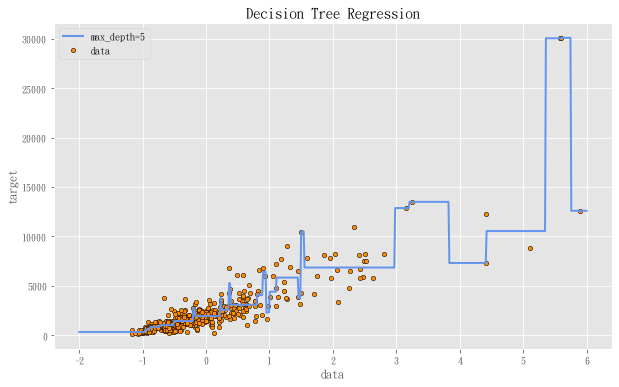

In [6]:
T = np.linspace(-2, 6, 600).reshape(-1,1) #reshape成二維矩陣

plt.figure(figsize=(10,6))
plt.scatter(X_train_std, y_train['總價元'], s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(T, dtr.predict(T), color="cornflowerblue", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()